In [1]:
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2

In [2]:
import nn_project
import collections
import itertools
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

from stop_words import get_stop_words
from wordcloud import WordCloud

In [3]:
stopwords_path = 'stopwords'
figures_path = 'figures'

In [4]:
samples_en, samples_cs, vocab_en, vocab_cs = nn_project.data.get_data(
    limit=100000,
    vocab_size=50,
)

In [5]:
for sample in itertools.islice(zip(samples_en, samples_cs), 10):
    print(sample)

(['Construction', 'and', 'repair', 'of', 'highways', 'and', '...'], ['Výstavba', 'a', 'oprava', 'automobilových', 'cest', 'a', '...'])
(['Services', 'of', 'language', 'translation', 'with', 'use', 'of', '...'], ['Služby', 'jazykového', 'překladu', 's', 'použití', 'spojení', '...'])
(['Services', 'in', 'maintenance', 'service', 'and', 'repair', '...'], ['Služby', 'technické', 'obsluhy', 'a', 'opravy', 'nákladních', '...'])
(['Services', 'in', 'maintenance', 'service', 'and', 'repair', '...'], ['Služby', 'technické', 'obsluhy', 'a', 'opravy', 'osobných', '...'])
(['Translator', 'Internet', 'is', 'a', 'Toolbar', 'for', 'MS', 'Internet', 'Explorer', '.', 'It', 'allows', 'you', 'to', 'translate', 'in', 'real', 'time', 'any', 'web', 'pasge', 'from', 'one', 'language', 'to', 'another', '.'], ['Clean', ',', 'repair', ',', 'and', 'optimize', 'your', 'system', 'with', 'the', 'leading', 'and', 'award-winning', 'Registry', 'Booster', 'from', 'Uniblue.Residual', 'files', ',', 'unused', 'and', 'unde

In [6]:
for token, token_id in vocab_en.items():
    print(token_id, token)

0 <?>
1 ,
2 .
3 the
4 and
5 of
6 to
7 in
8 a
9 is
10 The
11 for
12 :
13 /
14 hotel
15 with
16 you
17 Hotel
18 (
19 )
20 are
21 at
22 was
23 from
24 on
25 by
26 that
27 -
28 be
29 or
30 as
31 stay
32 [
33 ]
34 our
35 reviews
36 it
37 "
38 '
39 an
40 rooms
41 this
42 their
43 your
44 very
45 will
46 not
47 Rooms
48 can
49 room
50 all


In [7]:
for token, token_id in vocab_cs.items():
    print(token_id, token)

0 <?>
1 ,
2 .
3 a
4 the
5 v
6 /
7 and
8 :
9 Hotel
10 (
11 na
12 )
13 to
14 of
15 se
16 je
17 in
18 pro
19 hotel
20 s
21 is
22 -
23 was
24 The
25 do
26 '
27 [
28 pokoje
29 ]
30 hostů
31 Hodnocení
32 for
33 z
34 |
35 "
36 ...
37 k
38 za
39 hotelu
40 po
41 very
42 with
43 from
44 ve
45 nebo
46 !
47 má
48 služba
49 jsou
50 room


In [8]:
stopwords_en = set(get_stop_words('en'))
stopwords_cs = set(get_stop_words('cz'))

# with open(os.path.join(stopwords_path, 'stopwords-en.txt')) as i:
#     stopwords_en = set(stopword.strip() for stopword in i)
# with open(os.path.join(stopwords_path, 'stopwords-cs.txt')) as i:
#     stopwords_cs = set(stopword.strip() for stopword in i)

In [9]:
print('cz:', len(stopwords_en))
print('en:', len(stopwords_cs))

cz: 174
en: 256


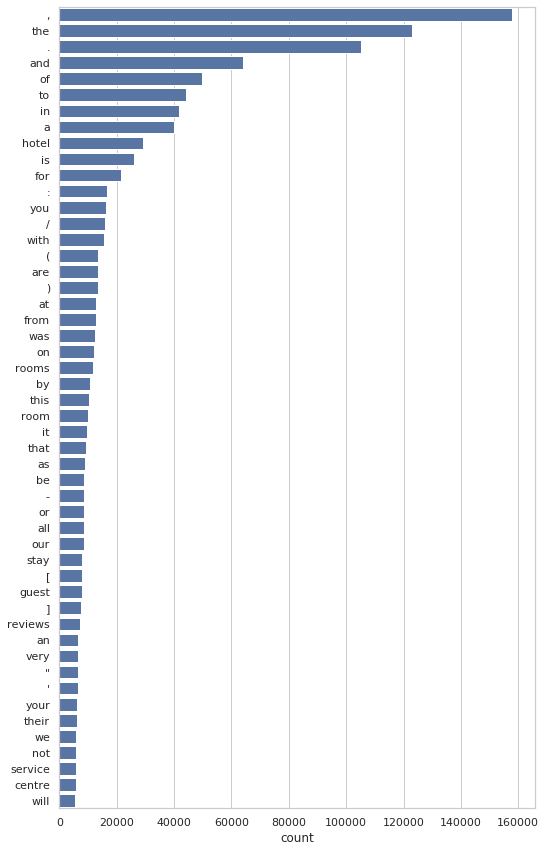

In [10]:
counter = collections.Counter(
    word.lower() for word in itertools.chain.from_iterable(samples_en)
)

df = pd.DataFrame(data=counter.most_common(50), columns=('word', 'count'))

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 12))
sns.barplot(x='count', y='word', data=df, label='Count', color='b')
fig.tight_layout()
ax.set_ylabel('')
fig.savefig(os.path.join(figures_path, 'histogram_en_unfiltered.png'))
fig.savefig(os.path.join(figures_path, 'histogram_en_unfiltered.eps'))

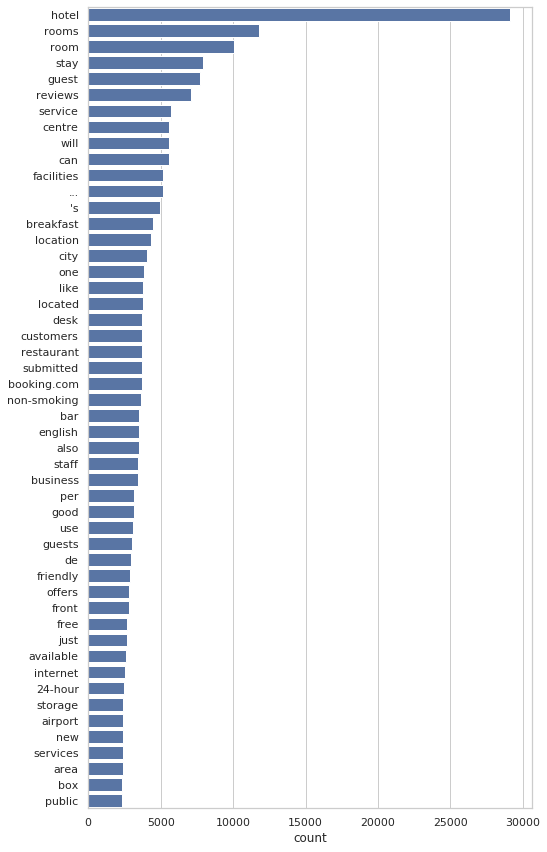

In [11]:
counter = collections.Counter(
    word.lower() for word in itertools.chain.from_iterable(samples_en)
    if word.lower() not in stopwords_en and len(word) > 1
)

df = pd.DataFrame(data=counter.most_common(50), columns=('word', 'count'))

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 12))
sns.barplot(x='count', y='word', data=df, label='Count', color='b')
fig.tight_layout()
ax.set_ylabel('')
fig.savefig(os.path.join(figures_path, 'histogram_en.png'))
fig.savefig(os.path.join(figures_path, 'histogram_en.eps'))

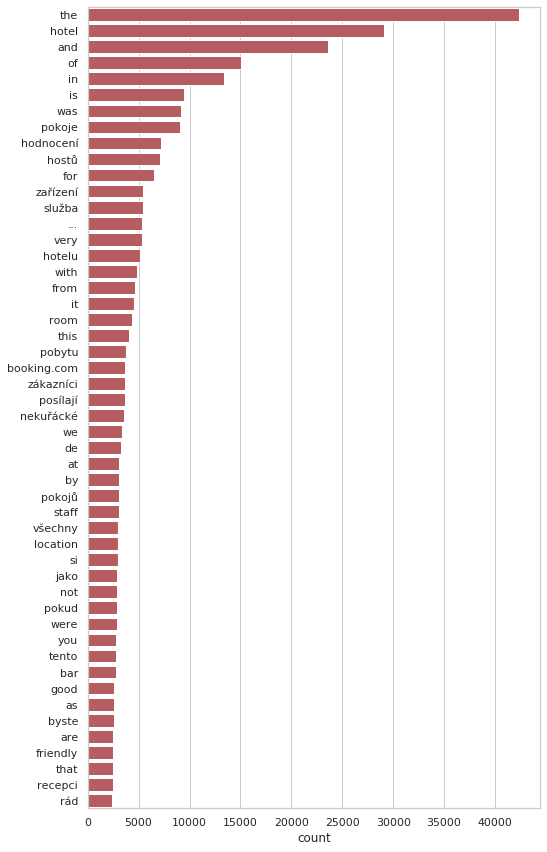

In [12]:
counter = collections.Counter(
    word.lower() for word in itertools.chain.from_iterable(samples_cs)
    if word.lower() not in stopwords_cs and len(word) > 1
)

df = pd.DataFrame(data=counter.most_common(50), columns=('word', 'count'))

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 12))
sns.barplot(x='count', y='word', data=df, label='Count', color='r')
fig.tight_layout()
ax.set_ylabel('')
fig.savefig(os.path.join(figures_path, 'histogram_cs.png'))
fig.savefig(os.path.join(figures_path, 'histogram_cs.eps'))

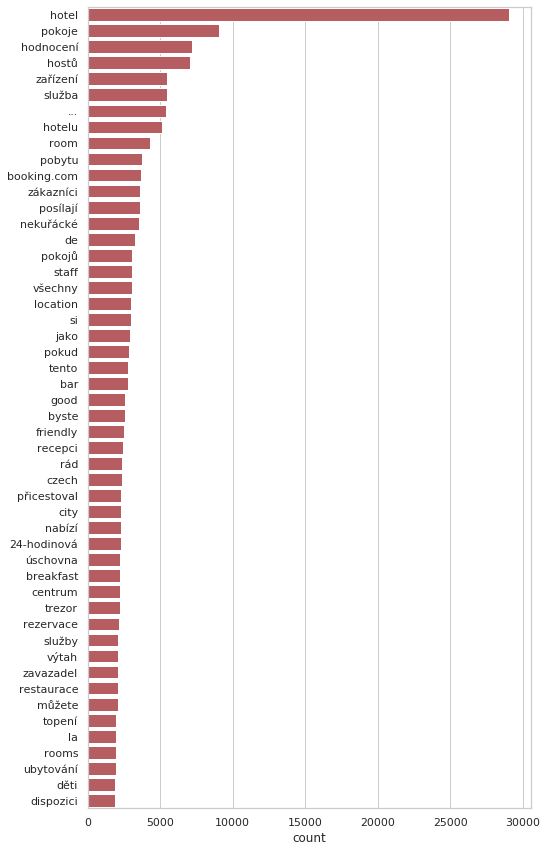

In [13]:
counter = collections.Counter(
    word.lower() for word in itertools.chain.from_iterable(samples_cs)
    if word.lower() not in stopwords_cs
    and word.lower() not in stopwords_en
    and len(word) > 1
)

df = pd.DataFrame(data=counter.most_common(50), columns=('word', 'count'))

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 12))
sns.barplot(x='count', y='word', data=df, label='Count', color='r')
fig.tight_layout()
ax.set_ylabel('')
fig.savefig(os.path.join(figures_path, 'histogram_cs_remove_en.png'))
fig.savefig(os.path.join(figures_path, 'histogram_cs_remove_en.eps'))

In [14]:
samples_en_text = ' '.join(itertools.chain.from_iterable(samples_en))
samples_cs_text = ' '.join(itertools.chain.from_iterable(samples_cs))

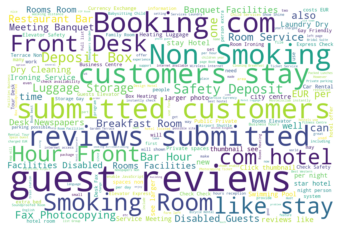

In [15]:
wordcloud = WordCloud(
    width=1500,
    height=1000,
    background_color='white',
    random_state = 42,
    stopwords=stopwords_en,
    min_word_length=2,
)
wordcloud.generate(samples_en_text)
wordcloud.to_file(os.path.join(figures_path, 'wordcloud_en.png'))
wordcloud.to_file(os.path.join(figures_path, 'wordcloud_en.eps'))

plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

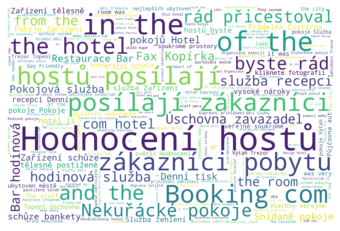

In [16]:
wordcloud = WordCloud(
    width=1500,
    height=1000,
    background_color='white',
    random_state = 42,
    stopwords=stopwords_cs,
    min_word_length=2,
)
wordcloud.generate(samples_cs_text)
wordcloud.to_file(os.path.join(figures_path, 'wordcloud_cs.png'))
wordcloud.to_file(os.path.join(figures_path, 'wordcloud_cs.eps'))

plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

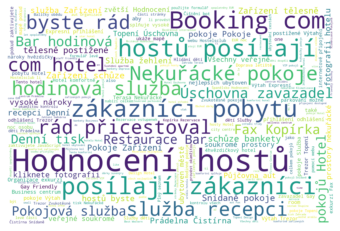

In [17]:
wordcloud = WordCloud(
    width=1500,
    height=1000,
    background_color='white',
    random_state = 42,
    stopwords=stopwords_cs | stopwords_en,
    min_word_length=2,
)
wordcloud.generate(samples_cs_text)
wordcloud.to_file(os.path.join(figures_path, 'wordcloud_cs_remove_en.png'))
wordcloud.to_file(os.path.join(figures_path, 'wordcloud_cs_remove_en.eps'))

plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()